# Análise dos dados

Importação da biblioteca de análise e pré-configuração

In [1]:
import pandas as pd
#Mostrar dados em até 2 casas decimais
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


Todas as colunas da base de dados do ENEM

In [2]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Fazer uma análise geral dessa base de dados

In [3]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

Dado as últimas colunas, talvez seja possível identificar alguma correlação?

Primeiro eliminar valores não preenchidos

In [4]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
#Mudar o nome das colunas
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
#Pequena análise da mudança
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Verificar o comprimento da base de dados original para verificar quantas linhas foram removidas

In [5]:
print("Comprimento original:", len(dados))
print("Novo comprimento:", len(dados_notas))
print("Número de linhas removidas:", len(dados)- len(dados_notas))

Comprimento original: 137844
Novo comprimento: 97270
Número de linhas removidas: 40574


Verificar uma correlação entre as notas

In [6]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Analisar como essa é essa correlação num heatmap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


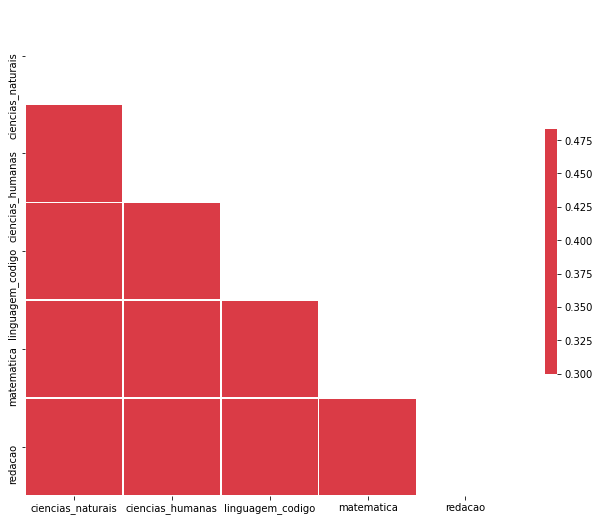

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerara uma paleta customizável
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Formando um quadrado

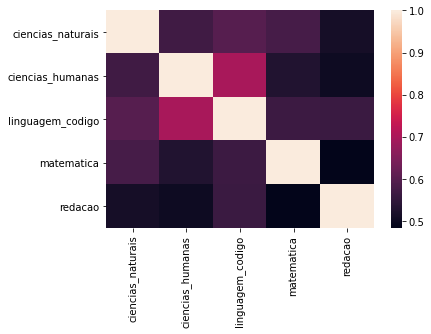

In [8]:
sns.heatmap(corr);

Pairplot dessas correlações

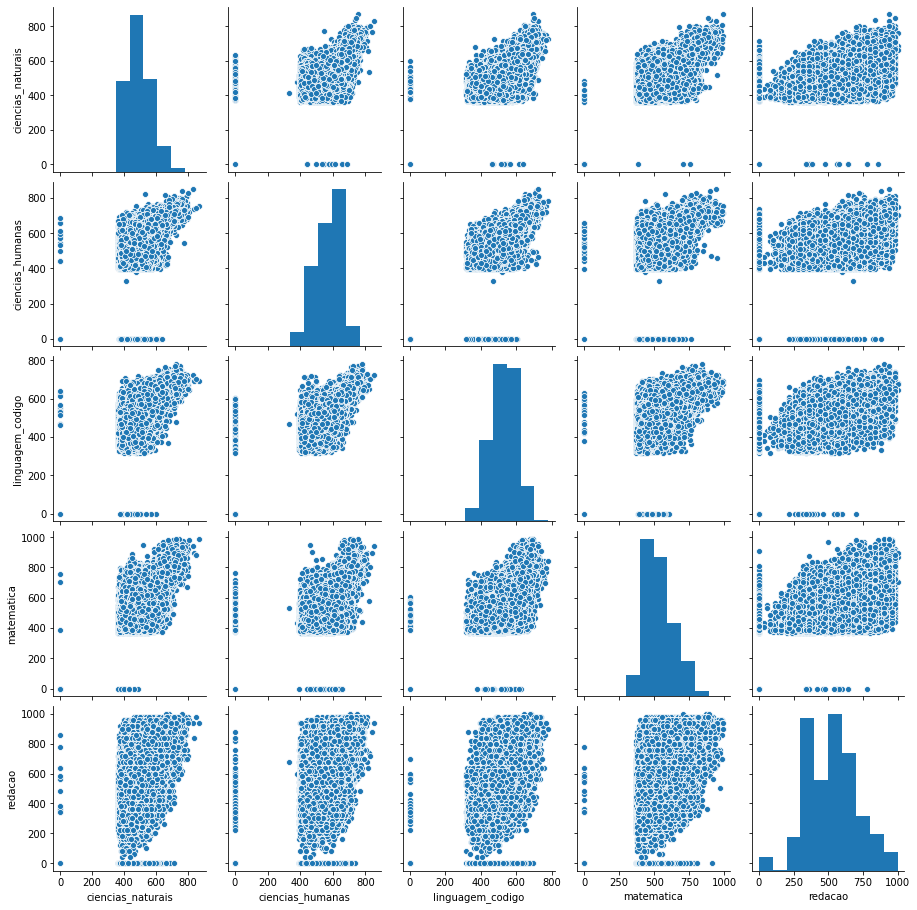

In [9]:
sns.pairplot(dados_notas);

# Desafios

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

Dado a pessoa não ter presença naquele dia, todas as notas daquele dia devem ser 0. Para isso verificar a presença da pessoa naquele dia

In [10]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [11]:
dados[["TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_MT"]]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,0.00,0.00,0.00,0.00
1,1.00,1.00,1.00,1.00
2,1.00,1.00,1.00,1.00
3,1.00,1.00,1.00,1.00
4,0.00,0.00,0.00,0.00
...,...,...,...,...
137839,0.00,0.00,0.00,0.00
137840,1.00,1.00,1.00,1.00
137841,0.00,0.00,0.00,0.00
137842,1.00,1.00,1.00,1.00


Ao observar o comportamento acima das presenças é possível verificar uma semelhança em relação aos 0's na prova e 1's na prova, em que os valores são os mesmos

In [12]:
#Verificar informações cujas presenças são 0(faltou à prova)
participantes_faltantes = dados.query("TP_PRESENCA_CN == TP_PRESENCA_CH == TP_PRESENCA_LC == TP_PRESENCA_MT == 0")
#Explorar essas faltas
participantes_faltantes

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A
5,180009171732,2018,2611606,Recife,26,PE,42.00,F,2.00,2,1,"2,609,402.00",Moreno,26.00,PE,1,9,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,E,D,C,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,B,B,A,B
7,180011038704,2018,2933307,Vitória da Conquista,29,BA,25.00,M,0.00,2,1,"2,933,307.00",Vitória da Conquista,29.00,BA,1,4,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,F,D,D,1,B,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A
14,180012756915,2018,5005707,Naviraí,50,MS,22.00,M,0.00,3,1,"5,005,707.00",Naviraí,50.00,MS,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,D,D,B,C,2,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137833,180011320427,2018,3548500,Santos,35,SP,18.00,F,0.00,4,1,"3,548,500.00",Santos,35.00,SP,2,0,2,1.00,0,"35,046,164.00","3,548,500.00",Santos,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,H,H,B,F,5,C,A,B,D,A,A,B,A,B,A,B,A,A,B,A,A,B,A,A,B,B,A
137837,180012211520,2018,3201209,Cachoeiro de Itapemirim,32,ES,24.00,M,0.00,5,1,"3,201,209.00",Cachoeiro de Itapemirim,32.00,ES,1,5,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,A,3,D,A,B,C,A,B,B,A,B,A,A,A,A,C,B,A,C,A,B,B,A,A
137839,180012079549,2018,4202305,Biguaçu,42,SC,21.00,F,0.00,1,1,"4,205,407.00",Florianópolis,42.00,SC,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,D,B,B,3,E,A,B,C,B,A,B,A,A,A,B,A,B,B,A,B,C,A,A,B,A,A
137841,180013130388,2018,2208650,Queimada Nova,22,PI,18.00,M,0.00,3,1,"2,208,650.00",Queimada Nova,22.00,PI,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,F,A,A,4,A,A,B,B,A,B,B,A,B,A,A,A,A,B,B,A,C,A,B,B,A,A


In [13]:
#Verificar informações de pessoas que vieram nos dois dias fazer a prova, presença igual a 1
participantes_vieram = dados.query("TP_PRESENCA_CN == TP_PRESENCA_CH == TP_PRESENCA_LC == TP_PRESENCA_MT == 1")
#Explorar os que vieram
participantes_vieram

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
6,180009943059,2018,2701308,Cajueiro,27,AL,17.00,F,0.00,3,1,"2,709,400.00",Viçosa,27.00,AL,2,0,2,1.00,0,"27,026,744.00","2,701,308.00",Cajueiro,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,120.00,120.00,80.00,140.00,100.00,560.00,B,B,A,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,B,A
8,180008290373,2018,2607307,Ipubi,26,PE,16.00,F,0.00,2,1,"2,607,307.00",Ipubi,26.00,PE,3,0,1,nan,1,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,0,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,1.00,160.00,120.00,140.00,140.00,100.00,660.00,D,D,B,B,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,A,B,C,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137835,180013566986,2018,2928703,Santo Antônio de Jesus,29,BA,20.00,M,0.00,2,1,"2,928,703.00",Santo Antônio de Jesus,29.00,BA,1,2,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,na

> Há mais uma categoria em que os candidatos podem ser eliminados(por não seguirem o caderno de prova, edital, etc) cuja presença é igual a 2.


> Como o candidato é eliminado da prova, ele ainda seria considerado como participante que veio ou faltou caso seja eliminado por exemplo no primeiro dia, para o primeiro dia. Assim, como candidato que faltou no segundo dia caso tenha sido eliminado no primeiro dia. O primeiro dia contém Linguagens, Códigos e suas Tecnologias; Ciências Humanas e Redação.

In [14]:
#Busca pela eliminação do primeiro dia
participantes_eliminados_primeiro_dia = dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 2")
#Explorar os que foram eliminados no primeiro dia
participantes_eliminados_primeiro_dia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2856,180012309536,2018,3300209,Araruama,33,RJ,40.00,F,1.00,3,1,"3,301,702.00",Duque de Caxias,33.00,RJ,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,C,B,B,C,5,A,A,B,C,A,A,B,B,B,A,A,A,A,C,B,A,D,B,B,B,D,B
8506,180010030190,2018,2615805,Tupanatinga,26,PE,17.00,F,0.00,3,1,"2,601,201.00",Arcoverde,26.00,PE,2,0,2,1.00,0,"26,048,337.00","2,615,805.00",Tupanatinga,26.00,PE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,DEADCCACADCCBCADABBBACABCABABBDDDBBDACABDADEB,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,NaN,NaN,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,nan,nan,nan,nan,nan,nan,nan,B,B,A,A,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,A,B,A
13818,180007652196,2018,3518701,Guarujá,35,SP,17.00,F,0.00,3,1,"3,518,701.00",Guarujá,35.00,SP,2,0,2,1.00,0,"35,037,217.00","3,518,701.00",Guarujá,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,B,C,B,3,D,A,C,C,A,A,B,B,B,A,B,A,A,B,A,A,D,A,B,A,B,A
16381,180012957985,2018,2806701,São Cristóvão,28,SE,34.00,M,0.00,0,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,12,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,B,C,B,1,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,B,A,A
23815,180013373158,2018,3147303,Paraisópolis,31,MG,26.00,F,0.00,3,1,"3,548,609.00",São Bento do Sapucaí,35.00,SP,1,7,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,C,B,4,B,A,B,C,A,A,B,A,B,A,B,A,A,B,B,A,B,A,A,A,A,A
25975,180007482862,2018,3205002,Serra,32,ES,21.00,M,0.00,3,1,"3,205,309.00",Vitória,32.00,ES,2,0,2,3.00,0,"32,074,425.00","3,205,002.00",Serra,32.00,ES,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,C,E,A,B,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,B,B,B,B,A
30096,180013149585,2018,4119152,Pinhais,41,PR,19.00,M,0.00,1,1,"4,106,902.00",Curitiba,41.00,PR,2,0,2,1.00,0,"41,387,724.00","4,119,152.00",Pinhais,41.00,PR,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,E,D,B,4,G,A,B,D,C,A,B,A,B,A,B,A,B,C,B,A,E,A,B,B,B,A
30596,180008787808,2018,1500800,Ananindeua,15,PA,21.00,F,0.00,3,1,"1,502,103.00",Cametá,15.00,PA,2,0,2,3.00,0,"15,034,844.00","1,500,800.00",Ananindeua,15.00,PA,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,E,B,B,4,B,A,B,B,A,A,B,B,B,B,A,A,A,B,B,A,B,A,A,B,B,A
32075,180009306372,2018,3304557,Rio de Janeiro,33,RJ,18.00,F,0.00,1,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,2,0,2,1.00,0,"33,083,592.00","3,304,557.00",Rio de Janeiro,33.00,RJ,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,E,B,B,3,B,A,B,B,A,A,B,B,A,A,A,A,A,B,A,A,B,A,A,B,B,A
32559,180008712985,2018,3550308,São Paulo,35,SP,22.00,M,0.00,3,1,"2,613,701.00",São Lourenço da Mata,26.00,PE,1,5,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,

In [15]:
#Busca pela eliminação no segundo dia
participantes_eliminados_segundo_dia = dados.query("TP_PRESENCA_CN == TP_PRESENCA_MT == 2")
#Explorar os que foram eliminados no segundo dia
participantes_eliminados_segundo_dia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
1144,180012005599,2018,2504603,Conde,25,PB,18.00,M,0.00,3,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,80.00,120.00,100.00,120.00,100.00,520.00,E,C,D,D,5,C,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,A,A
1947,180009431286,2018,3531209,Monte Alegre do Sul,35,SP,17.00,M,0.00,3,1,"3,501,905.00",Amparo,35.00,SP,2,0,2,1.00,0,"35,017,425.00","3,531,209.00",Monte Alegre do Sul,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,120.00,80.00,120.00,120.00,40.00,480.00,C,B,B,A,3,D,A,B,C,B,B,B,B,B,A,A,A,A,B,A,B,C,A,A,B,B,A
4891,180010373644,2018,1502400,Castanhal,15,PA,19.00,F,0.00,3,1,"2,108,702.00",Pio XII,21.00,MA,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,NaN,1.00,120.00,120.00,100.00,120.00,40.00,500.00,B,B,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,B,B,A
5054,180007789308,2018,4203303,Campo Alegre,42,SC,19.00,F,0.00,1,2,nan,NaN,nan,NaN,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,100.00,120.00,120.00,120.00,60.00,520.00,H,D,A,B,6,C,A,C,D,B,A,B,B,C,B,B,A,B,B,A,A,B,B,B,B,A,A
12112,180011500537,2018,4323002,Viamão,43,RS,24.00,F,0.00,3,1,"4,314,902.00",Porto Alegre,43.00,RS,1,5,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,120.00,80.00,60.00,100.00,40.00,400.00,D,D,B,B,9,D,A,B,E,A,A,B,B,B,B,A,A,A,B,A,B,E,B,A,A,A,A
30483,180007622437,2018,2403251,Parnamirim,24,RN,23.00,M,0.00,3,1,"2,402,709.00",Cerro Corá,24.00,RN,1,3,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,80.00,120.00,100.00,140.00,80.00,520.00,A,B,A,B,3,D,A,C,D,A,A,B,A,B,A,B,A,A,B,A,B,D,A,B,B,A,B
33867,180013596506,2018,4312401,Montenegro,43,RS,18.00,M,0.00,1,1,"4,312,401.00",Montenegro,43.00,RS,2,0,2,1.00,0,"43,087,213.00","4,312,401.00",Montenegro,43.00,RS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,80.00,120.00,120.00,80.00,80.00,480.00,D,F,C,D,4,G,A,D,D,B,A,B,B,B,A,B,A,B,D,B,A,C,A,D,B,B,A
38510,180009805708,2018,2300309,Acopiara,23,CE,19.00,M,0.00,2,1,"2,300,309.00",Acopiara,23.00,CE,1,1,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,140.00,120.00,120.00

Sendo assim, um candidato não será considerado eliminado nos dias da prova

In [16]:
#Confirmar teste
dados.query("TP_PRESENCA_CN == TP_PRESENCA_CH == TP_PRESENCA_LC == TP_PRESENCA_MT == 2")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027


Verificar candidatos que foram eliminados no primeiro dia e que vieram ou faltaram no segundo

In [17]:
participantes_eliminados_primeiro_dia = dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 2 & (TP_PRESENCA_MT == TP_PRESENCA_CN == 1 | TP_PRESENCA_MT == TP_PRESENCA_CN == 0)")
participantes_eliminados_primeiro_dia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
2856,180012309536,2018,3300209,Araruama,33,RJ,40.00,F,1.00,3,1,"3,301,702.00",Duque de Caxias,33.00,RJ,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,C,B,B,C,5,A,A,B,C,A,A,B,B,B,A,A,A,A,C,B,A,D,B,B,B,D,B
8506,180010030190,2018,2615805,Tupanatinga,26,PE,17.00,F,0.00,3,1,"2,601,201.00",Arcoverde,26.00,PE,2,0,2,1.00,0,"26,048,337.00","2,615,805.00",Tupanatinga,26.00,PE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,DEADCCACADCCBCADABBBACABCABABBDDDBBDACABDADEB,1,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,NaN,NaN,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,nan,nan,nan,nan,nan,nan,nan,B,B,A,A,4,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,A,B,A
13818,180007652196,2018,3518701,Guarujá,35,SP,17.00,F,0.00,3,1,"3,518,701.00",Guarujá,35.00,SP,2,0,2,1.00,0,"35,037,217.00","3,518,701.00",Guarujá,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,B,C,B,3,D,A,C,C,A,A,B,B,B,A,B,A,A,B,A,A,D,A,B,A,B,A
16381,180012957985,2018,2806701,São Cristóvão,28,SE,34.00,M,0.00,0,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,12,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,B,C,B,1,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,B,A,A
23815,180013373158,2018,3147303,Paraisópolis,31,MG,26.00,F,0.00,3,1,"3,548,609.00",São Bento do Sapucaí,35.00,SP,1,7,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,C,B,4,B,A,B,C,A,A,B,A,B,A,B,A,A,B,B,A,B,A,A,A,A,A
25975,180007482862,2018,3205002,Serra,32,ES,21.00,M,0.00,3,1,"3,205,309.00",Vitória,32.00,ES,2,0,2,3.00,0,"32,074,425.00","3,205,002.00",Serra,32.00,ES,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,C,E,A,B,3,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,B,B,B,B,B,A
30096,180013149585,2018,4119152,Pinhais,41,PR,19.00,M,0.00,1,1,"4,106,902.00",Curitiba,41.00,PR,2,0,2,1.00,0,"41,387,724.00","4,119,152.00",Pinhais,41.00,PR,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,E,D,B,4,G,A,B,D,C,A,B,A,B,A,B,A,B,C,B,A,E,A,B,B,B,A
30596,180008787808,2018,1500800,Ananindeua,15,PA,21.00,F,0.00,3,1,"1,502,103.00",Cametá,15.00,PA,2,0,2,3.00,0,"15,034,844.00","1,500,800.00",Ananindeua,15.00,PA,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,E,E,B,B,4,B,A,B,B,A,A,B,B,B,B,A,A,A,B,B,A,B,A,A,B,B,A
32075,180009306372,2018,3304557,Rio de Janeiro,33,RJ,18.00,F,0.00,1,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,2,0,2,1.00,0,"33,083,592.00","3,304,557.00",Rio de Janeiro,33.00,RJ,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,E,B,B,3,B,A,B,B,A,A,B,B,A,A,A,A,A,B,A,A,B,A,A,B,B,A
32559,180008712985,2018,3550308,São Paulo,35,SP,22.00,M,0.00,3,1,"2,613,701.00",São Lourenço da Mata,26.00,PE,1,5,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,

In [18]:
participantes_eliminados_segundo_dia = dados.query("TP_PRESENCA_CN == TP_PRESENCA_MT == 2 & (TP_PRESENCA_LC == TP_PRESENCA_CH == 1 | TP_PRESENCA_LC == TP_PRESENCA_CH  == 0)")
participantes_eliminados_segundo_dia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
1144,180012005599,2018,2504603,Conde,25,PB,18.00,M,0.00,3,1,"3,304,557.00",Rio de Janeiro,33.00,RJ,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,80.00,120.00,100.00,120.00,100.00,520.00,E,C,D,D,5,C,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,A,B,B,A,A
1947,180009431286,2018,3531209,Monte Alegre do Sul,35,SP,17.00,M,0.00,3,1,"3,501,905.00",Amparo,35.00,SP,2,0,2,1.00,0,"35,017,425.00","3,531,209.00",Monte Alegre do Sul,35.00,SP,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,120.00,80.00,120.00,120.00,40.00,480.00,C,B,B,A,3,D,A,B,C,B,B,B,B,B,A,A,A,A,B,A,B,C,A,A,B,B,A
4891,180010373644,2018,1502400,Castanhal,15,PA,19.00,F,0.00,3,1,"2,108,702.00",Pio XII,21.00,MA,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,NaN,1.00,120.00,120.00,100.00,120.00,40.00,500.00,B,B,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,B,B,A
5054,180007789308,2018,4203303,Campo Alegre,42,SC,19.00,F,0.00,1,2,nan,NaN,nan,NaN,1,1,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,100.00,120.00,120.00,120.00,60.00,520.00,H,D,A,B,6,C,A,C,D,B,A,B,B,C,B,B,A,B,B,A,A,B,B,B,B,A,A
12112,180011500537,2018,4323002,Viamão,43,RS,24.00,F,0.00,3,1,"4,314,902.00",Porto Alegre,43.00,RS,1,5,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,NaN,1.00,120.00,80.00,60.00,100.00,40.00,400.00,D,D,B,B,9,D,A,B,E,A,A,B,B,B,B,A,A,A,B,A,B,E,B,A,A,A,A
30483,180007622437,2018,2403251,Parnamirim,24,RN,23.00,M,0.00,3,1,"2,402,709.00",Cerro Corá,24.00,RN,1,3,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,80.00,120.00,100.00,140.00,80.00,520.00,A,B,A,B,3,D,A,C,D,A,A,B,A,B,A,B,A,A,B,A,B,D,A,B,B,A,B
33867,180013596506,2018,4312401,Montenegro,43,RS,18.00,M,0.00,1,1,"4,312,401.00",Montenegro,43.00,RS,2,0,2,1.00,0,"43,087,213.00","4,312,401.00",Montenegro,43.00,RS,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,80.00,120.00,120.00,80.00,80.00,480.00,D,F,C,D,4,G,A,D,D,B,A,B,B,B,A,B,A,B,D,B,A,C,A,D,B,B,A
38510,180009805708,2018,2300309,Acopiara,23,CE,19.00,M,0.00,2,1,"2,300,309.00",Acopiara,23.00,CE,1,1,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,NaN,1.00,140.00,120.00,120.00

> Assim, o candidato que for eliminado, independente de sua presença no outro dia em que não foi eliminado, sua nota no final será 0

> Além disso, há os candidatos que vieram para um dia e não vieram para o outro


In [19]:
#Candidatos que vieram no primeiro dia e não no segundo
participantes_desistentes_segundo_dia = dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 1 & TP_PRESENCA_MT == TP_PRESENCA_CN == 0")
participantes_desistentes_segundo_dia[["TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_MT"]]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
25,0.00,1.00,1.00,0.00
54,0.00,1.00,1.00,0.00
74,0.00,1.00,1.00,0.00
82,0.00,1.00,1.00,0.00
88,0.00,1.00,1.00,0.00
...,...,...,...,...
137677,0.00,1.00,1.00,0.00
137753,0.00,1.00,1.00,0.00
137777,0.00,1.00,1.00,0.00
137815,0.00,1.00,1.00,0.00


In [20]:
#Candidatos que não vieram no primeiro dia e sim no segundo
participantes_desistentes_primeiro_dia = dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 0 & TP_PRESENCA_MT == TP_PRESENCA_CN == 1 ")
participantes_desistentes_primeiro_dia

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
319,180012760785,2018,2611606,Recife,26,PE,41.00,M,3.00,4,1,"2,611,606.00",Recife,26.00,PE,1,12,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,EBBDEECDCDA.EADCBEAEDBBCBCADAECABADCADBACDAEA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,NaN,NaN,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,nan,nan,nan,nan,nan,nan,nan,B,D,C,B,3,I,D,C,D,B,A,B,A,B,A,B,A,A,D,B,B,C,A,C,B,A,D
766,180013482475,2018,4118204,Paranaguá,41,PR,17.00,M,0.00,3,1,"4,118,204.00",Paranaguá,41.00,PR,3,0,1,nan,1,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,1,0,0,0,0,0,0,0,0,0,...,CDBABACDABABBACEEBADBACCAACCADEBAEEADABABBCCA,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,NaN,NaN,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,nan,nan,nan,nan,nan,nan,nan,C,C,C,B,4,C,A,B,D,B,A,B,B,B,A,B,A,B,C,B,B,E,A,A,A,C,A
1526,180007697277,2018,2304905,Groaíras,23,CE,17.00,F,0.00,3,1,"2,304,905.00",Groaíras,23.00,CE,2,0,2,1.00,0,"23,019,344.00","2,304,905.00",Groaíras,23.00,CE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,DBECDCDBDCDCD..DDDCDABDDDDBDDBDBECCABDEDCDDEA,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,NaN,NaN,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,nan,nan,nan,nan,nan,nan,nan,B,B,A,A,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,B,A
2652,180009663862,2018,2302909,Capistrano,23,CE,18.00,M,0.00,3,1,"2,306,504.00",Itapiúna,23.00,CE,2,0,2,1.00,0,"23,054,409.00","2,302,909.00",Capistrano,23.00,CE,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,ACBCABAACCDBAEEDCBCBBAEAECDCBECCDCABAAEACDBCB,1,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,NaN,NaN,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,nan,nan,nan,nan,nan,nan,nan,C,C,A,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,B,A
3087,180012858400,2018,2611606,Recife,26,PE,42.00,M,0.00,2,1,"2,611,606.00",Recife,26.00,PE,1,12,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,CDEAABCCDBEECACEBACBDECBCDAADCBDAEAADEADCEDCC,1,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,NaN,NaN,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,nan,nan,nan,nan,nan,nan,nan,B,B,C,B,2,B,A,B,D,A,A,C,A,A,A,B,A,A,B,A,A,C,A,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134222,180010717790,2018,2611606,Recife,26,PE,24.00,M,0.00,1,1,"2,613,701.00",São Lourenço da Mata,26.00,PE,1,7,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,CCCCDBEBBDDDCCCCCCCECACADCCDCCCDBCCAEECCCDCCC,0,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,NaN,NaN,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,nan,nan,nan,nan,nan,nan,nan,C,C,A,A,4,C,A,B,C,A,A,B,A,A,A,B,A,A,C,B,B,B,B,A,B,A,A
134787,180012514783,2018,2211001,Teresina,22,PI,60.00,M,1.00,3,1,"2,211,001.00",Teresina,22.00,PI,2,0,2,3.00,0,"22,027,041.00","2,211,001.00",Teresina,22.00,PI,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,DCB*EBEDBBDCCCADCCEDCCBBACBECDCDADDDAEBDA

In [21]:
#Número total de candidatos aptos a tirarem zero em alguma situação(ou tiraram)
num_zeros = len(participantes_faltantes) + \
  len(participantes_eliminados_primeiro_dia) + \
  len(participantes_eliminados_segundo_dia) + \
  len(participantes_desistentes_segundo_dia) + \
  len(participantes_desistentes_primeiro_dia)

print("Número de candidatos com 0 em prova: %d"%num_zeros)

Número de candidatos com 0 em prova: 40568


In [22]:
#Verificar como é inserido quando o candidato é eliminado, as notas
#Situar quanto ao primeiro dia 
dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 2 & (TP_PRESENCA_MT == TP_PRESENCA_CN == 1 | TP_PRESENCA_MT == TP_PRESENCA_CN == 0)")[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
2856,nan,nan,nan,nan,nan
8506,385.10,nan,nan,493.90,nan
13818,nan,nan,nan,nan,nan
16381,nan,nan,nan,nan,nan
23815,nan,nan,nan,nan,nan
25975,nan,nan,nan,nan,nan
30096,nan,nan,nan,nan,nan
30596,nan,nan,nan,nan,nan
32075,nan,nan,nan,nan,nan
32559,nan,nan,nan,nan,nan


In [23]:
#Pessoas que faltaram
dados.query("TP_PRESENCA_CH == TP_PRESENCA_LC == 0 & TP_PRESENCA_MT == TP_PRESENCA_CN == 1")[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
319,0.00,nan,nan,894.30,nan
766,424.10,nan,nan,501.30,nan
1526,440.70,nan,nan,392.90,nan
2652,418.20,nan,nan,449.60,nan
3087,421.30,nan,nan,397.60,nan
...,...,...,...,...,...
134222,605.30,nan,nan,732.00,nan
134787,444.10,nan,nan,478.90,nan
135224,407.70,nan,nan,543.90,nan
135914,596.60,nan,nan,713.10,nan


> Pelas tabela, tanto as pessoas que faltam, como as que são eliminadas, não recebem 0, constam apenas com 0 as pessoas que estão aptas a receber nota(participaram da prova no dia e não foram eliminadas)

In [0]:
import numpy as np

In [25]:
#Pessoas que foram eliminadas, independente do dia, todas suas notas serão 0, assim
#Primeiro preencher os valores em nan
#Copiar as mudanças para uma nova tabela
def mudar_nota(area):
  dados_reformados.loc[dados['TP_PRESENCA_{}'.format(area)].isin([0,2]), 'NU_NOTA_{}'.format(area)] = 0 #0 para faltou e 2 para eliminado

dados_reformados = dados.copy()
mudar_nota("CH")
mudar_nota("LC")
mudar_nota("MT")
mudar_nota("CN")
#visualizar a mudança
dados_reformados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00
...,...,...,...,...
137839,0.00,0.00,0.00,0.00
137840,382.40,534.20,468.10,576.40
137841,0.00,0.00,0.00,0.00
137842,452.70,509.30,527.70,591.40


Dados originais

In [26]:
dados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,nan,nan,nan,nan
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,nan,nan,nan,nan
...,...,...,...,...
137839,nan,nan,nan,nan
137840,382.40,534.20,468.10,576.40
137841,nan,nan,nan,nan
137842,452.70,509.30,527.70,591.40


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

Heatmap dos dados originais

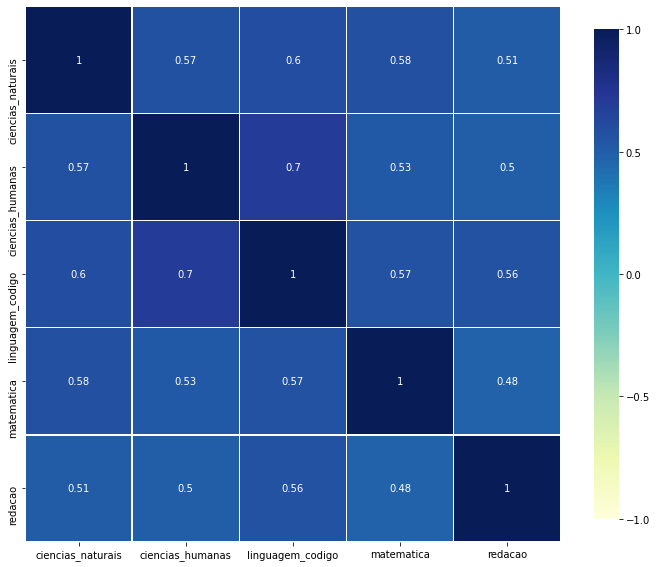

In [27]:
matriz_correlacao = dados_notas.corr()
fig, ax = plt.subplots(figsize=(12,18))
heat = sns.heatmap(matriz_correlacao, cmap="YlGnBu",vmin=-1, vmax=1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5, "ticks": [-1, -0.5, 0, 0.5, 1]}, annot=True);

  

Heatmap dos dados alterados

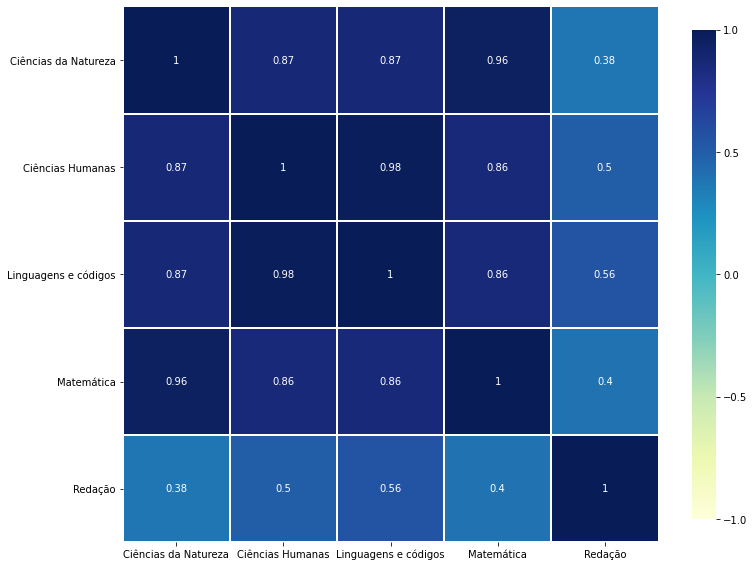

In [28]:
matriz_correlacao = dados_reformados[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()
fig, ax = plt.subplots(figsize=(12,18))
heat = sns.heatmap(matriz_correlacao, cmap="YlGnBu",vmin=-1, vmax=1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5, "ticks": [-1, -0.5, 0, 0.5, 1]}, annot=True,
            xticklabels=['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e códigos', 'Matemática', 'Redação'],
            yticklabels=['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e códigos', 'Matemática', 'Redação']);



## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

Pegar o gabarito e as respostas para cada área

In [0]:
#Copiar para outro dataframe
dados_reformados2 = dados_reformados.copy()
#Trocar os valores em NaN na redação por 0
dados_reformados2[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].fillna(0)
#AREAS
areas = ['CN', 'CH', 'LC', 'MT']
#Função para calcular para cada área
def calcula_acertos(aluno, area):
  #pegar para a determinada área
  RESPOSTAS = aluno.get('TX_RESPOSTAS_{}'.format(area))
  GABARITO = aluno.get('TX_GABARITO_{}'.format(area))

  #Não contar com NaN
  if (type(RESPOSTAS) != str or type(GABARITO) != str):
    return 0
  #Aqui basicamente o que irá acontecer será pegar cada elemento dentro da coluna com as respostas
  #e os gabaritos e então verificar sua igualdade, e então irá somar cada vez que isso for verdade,
  #o mesmo poderia ser feito para indicar a quantidade de respostas erradas
  #Mais referência em https://realpython.com/python-zip-function/
  return sum(RESPOSTA == GABARITO for RESPOSTA, GABARITO in zip(RESPOSTAS, GABARITO))

#percorrer as areas
for area in areas:
  #Aplicar cada relação dessa para uma LINHA, para pegar cada aluno
  dados_reformados2["NU_ACERTOS_{}".format(area)] = dados_reformados2.apply(calcula_acertos, area=area, axis=1)

Visualizar as notas

In [30]:
dados_reformados2[["NU_ACERTOS_CN","NU_ACERTOS_CH", "NU_ACERTOS_LC", "NU_ACERTOS_MT", "NU_NOTA_REDACAO"]]

,NU_ACERTOS_CN,NU_ACERTOS_CH,NU_ACERTOS_LC,NU_ACERTOS_MT,NU_NOTA_REDACAO
0,0,0,0,0,nan
1,11,27,33,22,680.00
2,8,9,8,6,600.00
3,7,10,11,10,400.00
4,0,0,0,0,nan
...,...,...,...,...,...
137839,0,0,0,0,nan
137840,7,11,13,13,380.00
137841,0,0,0,0,nan
137842,10,11,15,13,300.00


Pairplot com os acertos e a nota da redação

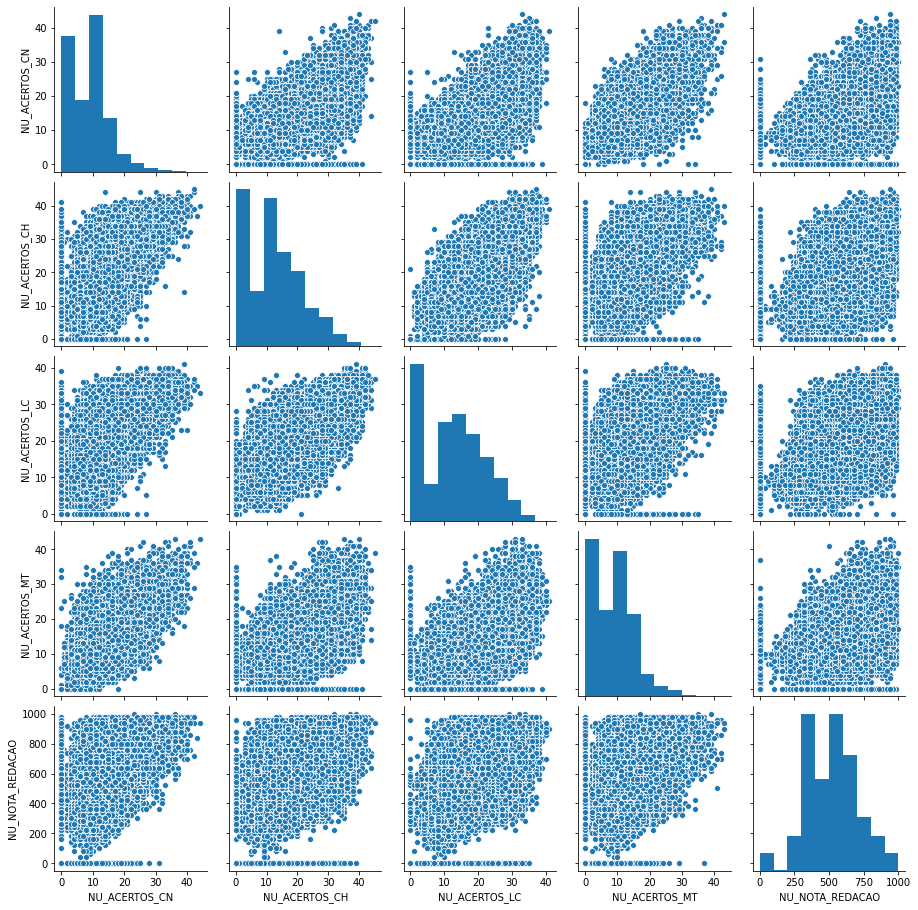

In [31]:
sns.pairplot(data=dados_reformados2[["NU_ACERTOS_CN","NU_ACERTOS_CH", "NU_ACERTOS_LC", "NU_ACERTOS_MT", "NU_NOTA_REDACAO"]]);

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [32]:
#substituir 0's por nan
import numpy as np

#Remover notas 0 em outra tabela
dados_sem_nota_zero = dados_reformados2.copy()

#Áreas de conhecimento, substituir o 0 por NaN
dados_sem_nota_zero['NU_NOTA_CN'] = dados_sem_nota_zero['NU_NOTA_CN'].replace(0., np.NAN)
dados_sem_nota_zero['NU_NOTA_CH'] = dados_sem_nota_zero['NU_NOTA_CH'].replace(0., np.NAN)
dados_sem_nota_zero['NU_NOTA_LC'] = dados_sem_nota_zero['NU_NOTA_LC'].replace(0., np.NAN)
dados_sem_nota_zero['NU_NOTA_MT'] = dados_sem_nota_zero['NU_NOTA_MT'].replace(0., np.NAN)

#Retirar o NaN com relação a essas colunas
dados_sem_nota_zero.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

#Modificação
dados_sem_nota_zero[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
6,428.50,505.20,521.00,436.80
8,491.80,575.70,524.40,487.60


Original

In [33]:
dados_reformados2[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00
...,...,...,...,...
137839,0.00,0.00,0.00,0.00
137840,382.40,534.20,468.10,576.40
137841,0.00,0.00,0.00,0.00
137842,452.70,509.30,527.70,591.40


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

No ENEM, cada existem diferentes cores de prova, em que algumas questões podem ou não ter o mesmo número, mas geralmente não se correspondem. Assim é necessário verificar para cada cor o código, equivalente, aqui em particular será feita a análise da prova Rosa

Função que corrige as questões

In [0]:
def corrige_questao(aluno, area):
  #pegar para a determinada área
  RESPOSTAS = aluno.get('TX_RESPOSTAS_{}'.format(area))
  GABARITO = aluno.get('TX_GABARITO_{}'.format(area))
  #Não contar com NaN
  if (type(RESPOSTAS) != str or type(GABARITO) != str):
      return 0
  
  #Retornar uma Series com os valores com 1 para resposta falsa e 0 para errada, aqui faz a conversão do tipo
  return pd.Series([int(RESPOSTA == GABARITO) for RESPOSTA, GABARITO in zip(RESPOSTAS, GABARITO)])


Prova Rosa



> Dicionário com os microdados

> Para Ciências da Natureza o código é 450

> Para Ciências Humanas o código é 454

> Para Linguagens e Códigos o código é 457 

> Para Matemática o código é 461







#### Ciências da Natureza

In [35]:
#CN
prova_rosa_cn = dados.query("CO_PROVA_CN == 450")
#Pegar as linhas
correcao_da_prova_cn = prova_rosa_cn.apply(corrige_questao, area="CN", axis= 1)
#Verificar a correção
correcao_da_prova_cn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
6,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
9,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,0,1
11,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
21,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137812,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0
137813,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
137814,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
137832,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0


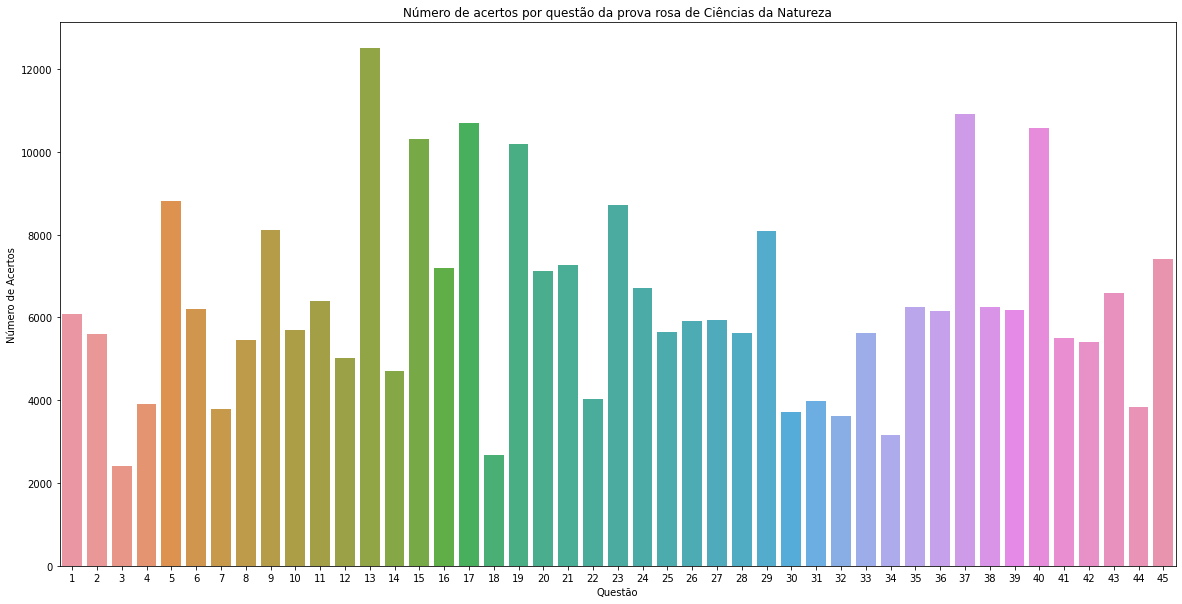

In [36]:
acertos_por_questao_cn = pd.DataFrame(correcao_da_prova_cn.sum())
#Criar uma nova coluna indice
acertos_por_questao_cn.reset_index(inplace=True)
#Mudar o nome das colunas
acertos_por_questao_cn.columns = ["Questão", "Num_Acertos"]
#O número começa a partir do 0, somar + 1
acertos_por_questao_cn["Questão"] = acertos_por_questao_cn["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Acertos", data=acertos_por_questao_cn)

ax.set_ylabel("Número de Acertos")
ax.set_title("Número de acertos por questão da prova rosa de Ciências da Natureza")

plt.show()

Calcular agora o número de erros

In [0]:
def corrige_questao_inversa(aluno, area):
  #pegar para a determinada área
  RESPOSTAS = aluno.get('TX_RESPOSTAS_{}'.format(area))
  GABARITO = aluno.get('TX_GABARITO_{}'.format(area))
  #Não contar com NaN
  if (type(RESPOSTAS) != str or type(GABARITO) != str):
      return 0
  
  #Retornar uma Series com os valores com 1 para resposta errada e 0 para a certa, aqui faz a conversão do tipo
  return pd.Series([int(RESPOSTA != GABARITO) for RESPOSTA, GABARITO in zip(RESPOSTAS, GABARITO)])


In [38]:
#Pegar as linhas
correcao_da_prova_inversa_cn = prova_rosa_cn.apply(corrige_questao_inversa, area="CN", axis= 1)
#Verificar a correção
correcao_da_prova_inversa_cn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0
6,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0
9,0,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,1,1,1,0
11,0,1,1,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1
21,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137812,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,0,0,0,1,1,1,1
137813,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1
137814,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1
137832,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1


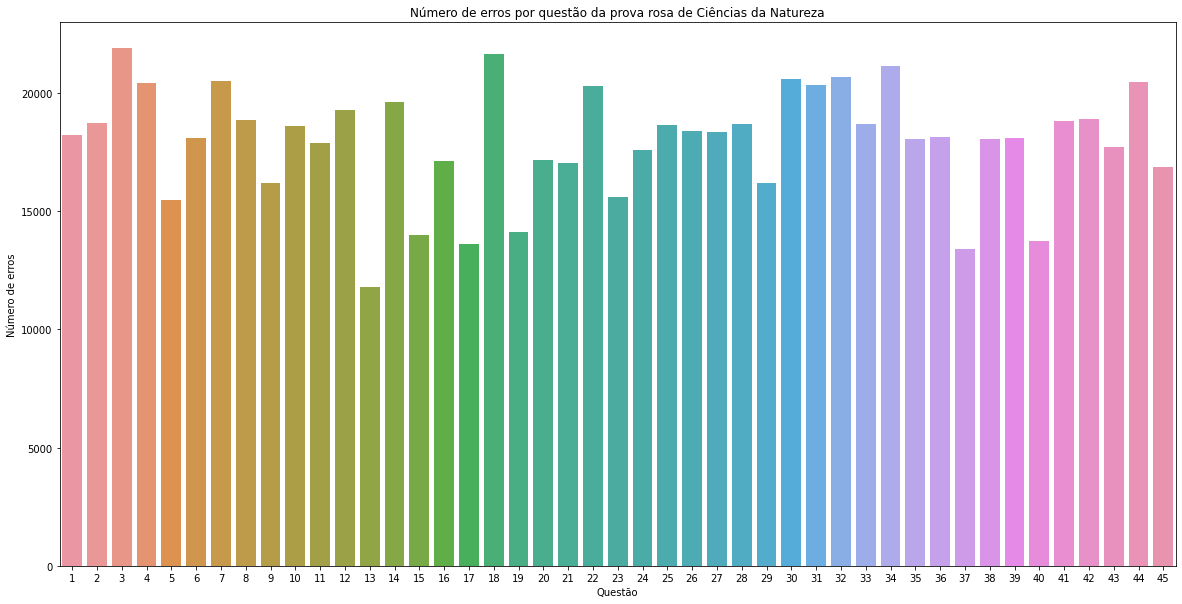

In [39]:
#Armazenar em uma nova tabela os erros
erros_por_questao_cn = pd.DataFrame(correcao_da_prova_inversa_cn.sum())
#Criar uma nova coluna indice
erros_por_questao_cn.reset_index(inplace=True)
#Mudar o nome das colunas
erros_por_questao_cn.columns = ["Questão", "Num_Erros"]
#O número começa a partir do 0, somar + 1
erros_por_questao_cn["Questão"] = erros_por_questao_cn["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Erros", data=erros_por_questao_cn)

ax.set_ylabel("Número de erros")
ax.set_title("Número de erros por questão da prova rosa de Ciências da Natureza")

plt.show()

Dados gerais da prova de Ciências da Natureza caderno rosa

In [40]:
#Valor máximo de erro e acerto
max_acerto = acertos_por_questao_cn["Num_Acertos"].max()
max_erro = erros_por_questao_cn["Num_Erros"].max()

print("Número da questão com mais acertos: {}".format(acertos_por_questao_cn.query("Num_Acertos == @max_acerto")['Questão'].values[0]))
print("Número da questão com mais erros: {}".format(erros_por_questao_cn.query("Num_Erros == @max_erro")['Questão'].values[0]))
print("Maior número de acertos: %d"%max_acerto)
print("Maior número de erros: %d"%max_erro)

Número da questão com mais acertos: 13
Número da questão com mais erros: 3
Maior número de acertos: 12502
Maior número de erros: 21894


#### Matemática

In [41]:
#MT
prova_rosa_mt = dados.query("CO_PROVA_MT == 461")
#Pegar as linhas
correcao_da_prova_mt = prova_rosa_mt.apply(corrige_questao, area="MT", axis= 1)
#Verificar a correção
correcao_da_prova_mt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0
21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137812,1,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0
137813,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
137814,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
137832,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0


Barplot dos acertos

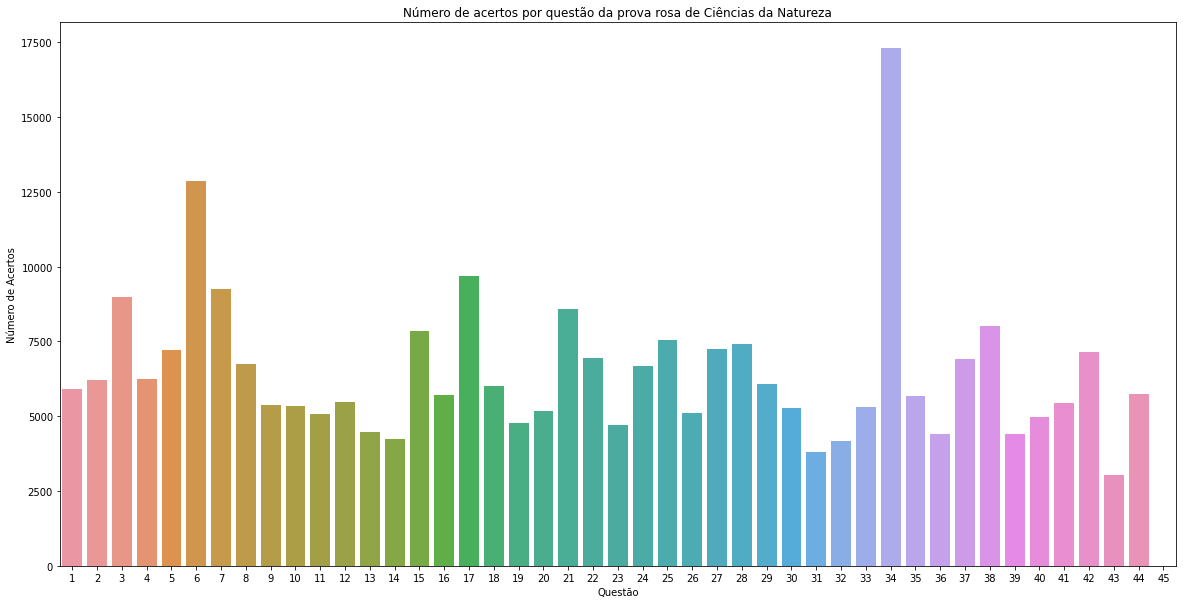

In [42]:
acertos_por_questao_mt = pd.DataFrame(correcao_da_prova_mt.sum())
#Criar uma nova coluna indice
acertos_por_questao_mt.reset_index(inplace=True)
#Mudar o nome das colunas
acertos_por_questao_mt.columns = ["Questão", "Num_Acertos"]
#O número começa a partir do 0, somar + 1
acertos_por_questao_mt["Questão"] = acertos_por_questao_mt["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Acertos", data=acertos_por_questao_mt)

ax.set_ylabel("Número de Acertos")
ax.set_title("Número de acertos por questão da prova rosa de Ciências da Natureza")

plt.show()

Calcular agora o número de erros

In [43]:
#Pegar as linhas
correcao_da_prova_inversa_mt = prova_rosa_mt.apply(corrige_questao_inversa, area="MT", axis= 1)
#Verificar a correção
correcao_da_prova_inversa_mt

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
3,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,1
6,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
9,1,1,0,0,1,0,1,0,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
11,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1
21,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137812,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1
137813,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1
137814,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1
137832,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1


Barplot dos erros

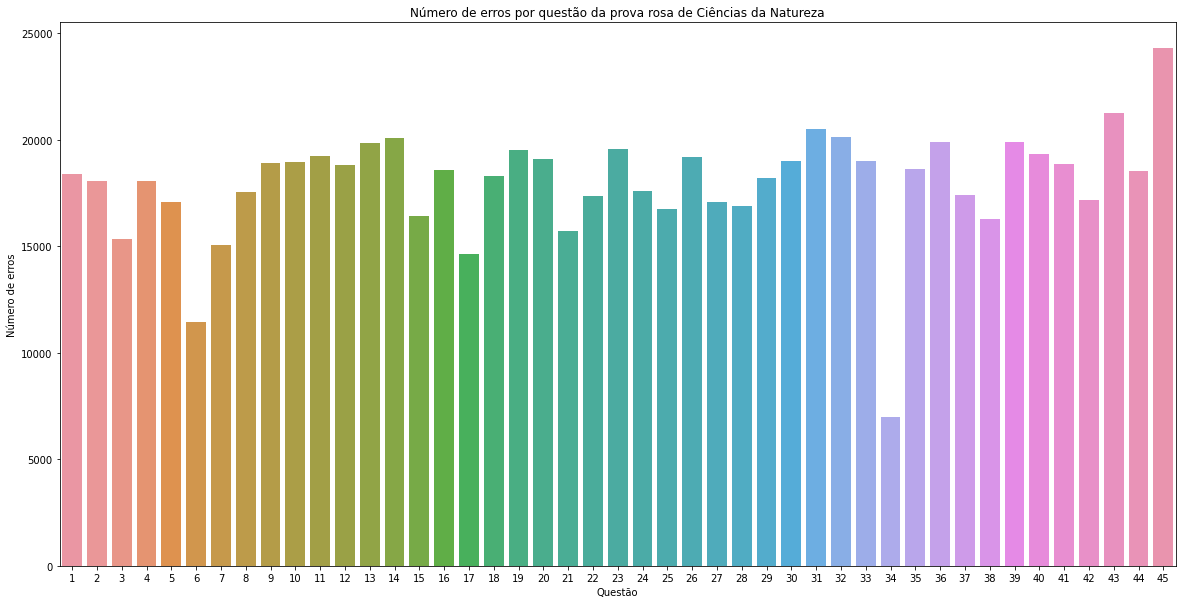

In [44]:
#Armazenar em uma nova tabela os erros
erros_por_questao_mt = pd.DataFrame(correcao_da_prova_inversa_mt.sum())
#Criar uma nova coluna indice
erros_por_questao_mt.reset_index(inplace=True)
#Mudar o nome das colunas
erros_por_questao_mt.columns = ["Questão", "Num_Erros"]
#O número começa a partir do 0, somar + 1
erros_por_questao_mt["Questão"] = erros_por_questao_mt["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Erros", data=erros_por_questao_mt)

ax.set_ylabel("Número de erros")
ax.set_title("Número de erros por questão da prova rosa de Ciências da Natureza")

plt.show()

Dados gerais da prova de Matemática

In [45]:
#Valor máximo de erro e acerto
max_acerto = acertos_por_questao_mt["Num_Acertos"].max()
max_erro = erros_por_questao_mt["Num_Erros"].max()

print("Número da questão com mais acertos: {}".format(acertos_por_questao_mt.query("Num_Acertos == @max_acerto")['Questão'].values[0]))
print("Número da questão com mais erros: {}".format(erros_por_questao_mt.query("Num_Erros == @max_erro")['Questão'].values[0]))
print("Maior número de acertos: %d"%max_acerto)
print("Maior número de erros: %d"%max_erro)

Número da questão com mais acertos: 34
Número da questão com mais erros: 45
Maior número de acertos: 17309
Maior número de erros: 24299


#### Linguagem e códigos

In [46]:
#LC
prova_rosa_lc = dados.query("CO_PROVA_LC == 457")
#Pegar as linhas
correcao_da_prova_lc = prova_rosa_lc.apply(corrige_questao, area="LC", axis= 1)
#Verificar a correção
correcao_da_prova_lc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,0,1,1,1,0,1,0,1
8,1,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1
12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0
21,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137830,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0
137831,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
137835,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
137840,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1


Barplot dos acertos

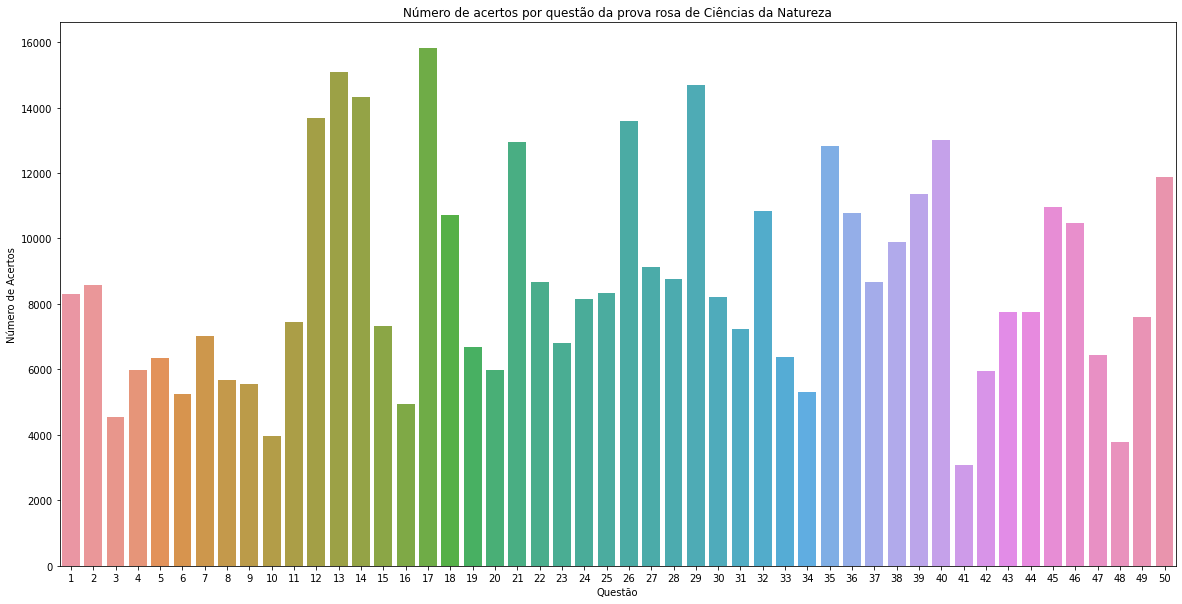

In [47]:
acertos_por_questao_lc = pd.DataFrame(correcao_da_prova_lc.sum())
#Criar uma nova coluna indice
acertos_por_questao_lc.reset_index(inplace=True)
#Mudar o nome das colunas
acertos_por_questao_lc.columns = ["Questão", "Num_Acertos"]
#O número começa a partir do 0, somar + 1
acertos_por_questao_lc["Questão"] = acertos_por_questao_lc["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Acertos", data=acertos_por_questao_lc)

ax.set_ylabel("Número de Acertos")
ax.set_title("Número de acertos por questão da prova rosa de Ciências da Natureza")

plt.show()

Calcular agora o número de erros 

In [48]:
#Pegar as linhas
correcao_da_prova_inversa_lc = prova_rosa_lc.apply(corrige_questao_inversa, area="LC", axis= 1)
#Verificar a correção
correcao_da_prova_inversa_lc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
8,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1
9,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0
12,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
21,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137830,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
137831,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
137835,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0
137840,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0


BarPlot dos erros

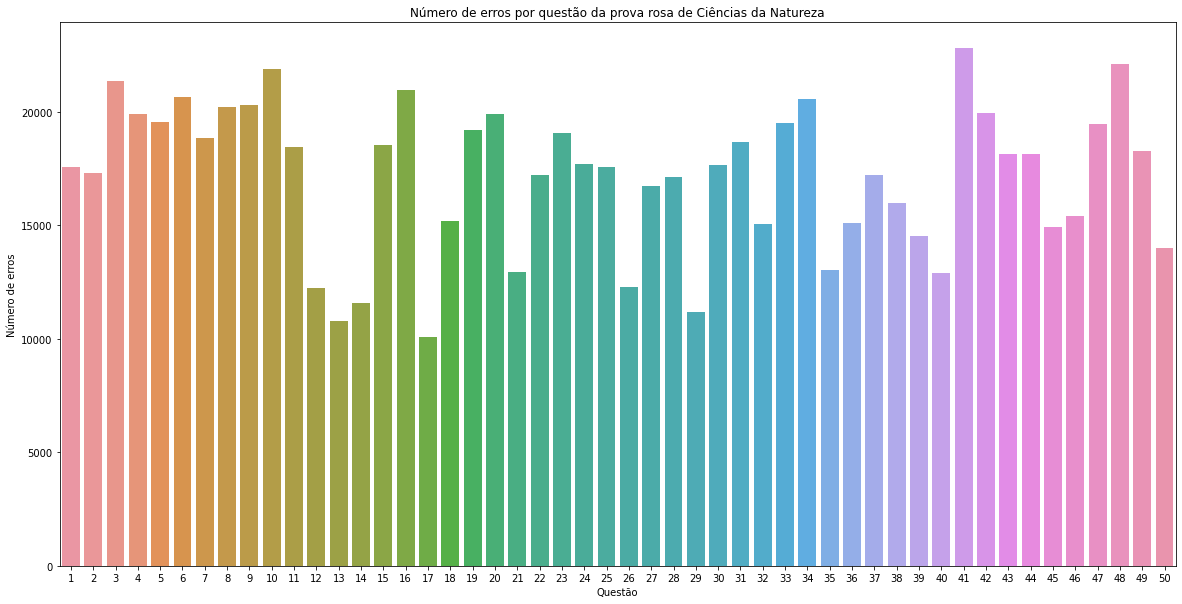

In [49]:
#Armazenar em uma nova tabela os erros
erros_por_questao_lc = pd.DataFrame(correcao_da_prova_inversa_lc.sum())
#Criar uma nova coluna indice
erros_por_questao_lc.reset_index(inplace=True)
#Mudar o nome das colunas
erros_por_questao_lc.columns = ["Questão", "Num_Erros"]
#O número começa a partir do 0, somar + 1
erros_por_questao_lc["Questão"] = erros_por_questao_lc["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Erros", data=erros_por_questao_lc)

ax.set_ylabel("Número de erros")
ax.set_title("Número de erros por questão da prova rosa de Ciências da Natureza")

plt.show()

Dados gerais de Linguagens e códigos

In [50]:
#Valor máximo de erro e acerto
max_acerto = acertos_por_questao_lc["Num_Acertos"].max()
max_erro = erros_por_questao_lc["Num_Erros"].max()

print("Número da questão com mais acertos: {}".format(acertos_por_questao_lc.query("Num_Acertos == @max_acerto")['Questão'].values[0]))
print("Número da questão com mais erros: {}".format(erros_por_questao_lc.query("Num_Erros == @max_erro")['Questão'].values[0]))
print("Maior número de acertos: %d"%max_acerto)
print("Maior número de erros: %d"%max_erro)

Número da questão com mais acertos: 17
Número da questão com mais erros: 41
Maior número de acertos: 15816
Maior número de erros: 22816


#### Ciências Humanas

In [51]:
#CH
prova_rosa_ch = dados.query("CO_PROVA_CH == 454")
#Pegar as linhas
correcao_da_prova_ch = prova_rosa_ch.apply(corrige_questao, area="CH", axis= 1)
#Verificar a correção
correcao_da_prova_ch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1
8,0,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
9,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,0,1,1,0
12,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1
21,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137830,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
137831,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
137835,1,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
137840,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


BarPlot dos acertos

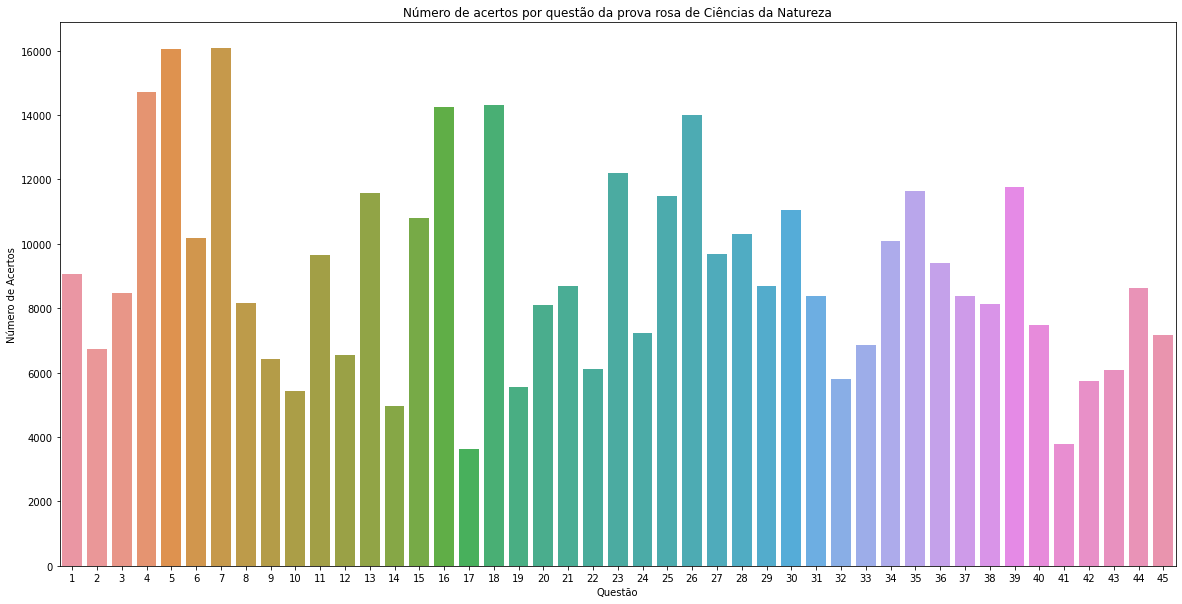

In [52]:
acertos_por_questao_ch = pd.DataFrame(correcao_da_prova_ch.sum())
#Criar uma nova coluna indice
acertos_por_questao_ch.reset_index(inplace=True)
#Mudar o nome das colunas
acertos_por_questao_ch.columns = ["Questão", "Num_Acertos"]
#O número começa a partir do 0, somar + 1
acertos_por_questao_ch["Questão"] = acertos_por_questao_ch["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Acertos", data=acertos_por_questao_ch)

ax.set_ylabel("Número de Acertos")
ax.set_title("Número de acertos por questão da prova rosa de Ciências da Natureza")

plt.show()

Calcular agora o erro

In [53]:
#Pegar as linhas
correcao_da_prova_inversa_ch = prova_rosa_lc.apply(corrige_questao_inversa, area="LC", axis= 1)
#Verificar a correção
correcao_da_prova_inversa_ch

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
8,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1
9,1,1,1,1,1,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0
12,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,0,1,1,1,1
21,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137830,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,0,1,1,1,1
137831,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
137835,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0
137840,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0


Barplot dos erros

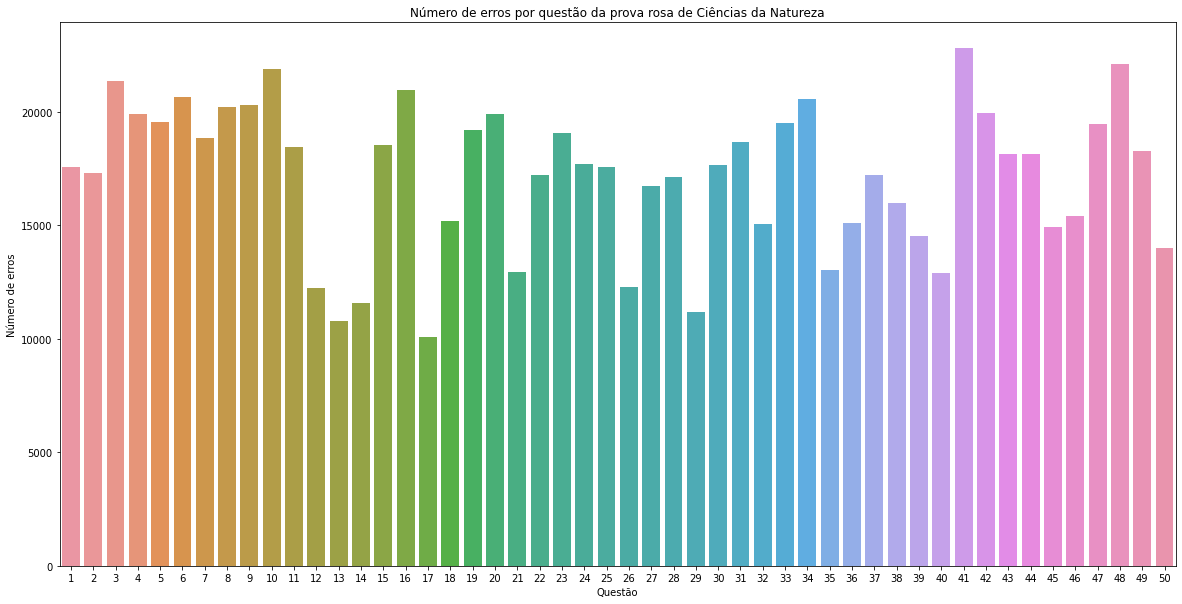

In [54]:
#Armazenar em uma nova tabela os erros
erros_por_questao_ch = pd.DataFrame(correcao_da_prova_inversa_ch.sum())
#Criar uma nova coluna indice
erros_por_questao_ch.reset_index(inplace=True)
#Mudar o nome das colunas
erros_por_questao_ch.columns = ["Questão", "Num_Erros"]
#O número começa a partir do 0, somar + 1
erros_por_questao_ch["Questão"] = erros_por_questao_ch["Questão"] + 1

#Tamanho da figura
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="Questão", y="Num_Erros", data=erros_por_questao_ch)

ax.set_ylabel("Número de erros")
ax.set_title("Número de erros por questão da prova rosa de Ciências da Natureza")

plt.show()

Dados gerais de Ciências Humanas

In [55]:
#Valor máximo de erro e acerto
max_acerto = acertos_por_questao_ch["Num_Acertos"].max()
max_erro = erros_por_questao_ch["Num_Erros"].max()

print("Número da questão com mais acertos: {}".format(acertos_por_questao_ch.query("Num_Acertos == @max_acerto")['Questão'].values[0]))
print("Número da questão com mais erros: {}".format(erros_por_questao_ch.query("Num_Erros == @max_erro")['Questão'].values[0]))
print("Maior número de acertos: %d"%max_acerto)
print("Maior número de erros: %d"%max_erro)

Número da questão com mais acertos: 7
Número da questão com mais erros: 41
Maior número de acertos: 16076
Maior número de erros: 22816


## Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

É importante analisar esse caso, por que atualmente existe um grande volume de dados, o qual aumenta a cada dia, é necessário ter um controle desse volume e como utilizá-los a fim de um benefício comum e não para um malefício, apesar de ser de grande ajuda seguir a lei como base, será que o que a lei não proibe também é ético? Não traz situações tão ruins quanto ou até pior do que a lei proibe?